# DAY 3 — Univariate & Bivariate EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("reports/figures", exist_ok=True)

sns.set(style="whitegrid")
df=pd.read_csv("day2_output.csv")

### 1. Univariate Analysis (One Variable at a Time)


 ### For Numerical Columns:
 

### Histogram – Days in Hospital

##### Purpose:

##### To understand the distribution of hospital stay length.

##### Helps understand if longer hospital stays are common and whether they may influence readmission.

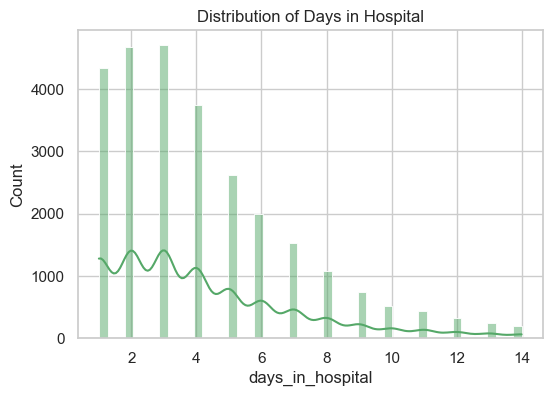

In [2]:
plt.figure(figsize=(6,4))
sns.histplot(df['days_in_hospital'], kde=True,color="g")
plt.title("Distribution of Days in Hospital")
plt.savefig("reports/figures/days_distribution.png")
plt.show()

### Box plot-total medicines

##### purpose:

##### To detect spread and outliers in medication count.

##### Helps identify whether patients receiving more medications are at higher risk of readmission.

###### Most patients took between 10–20 medicines, Typical patient took around 15 medicines

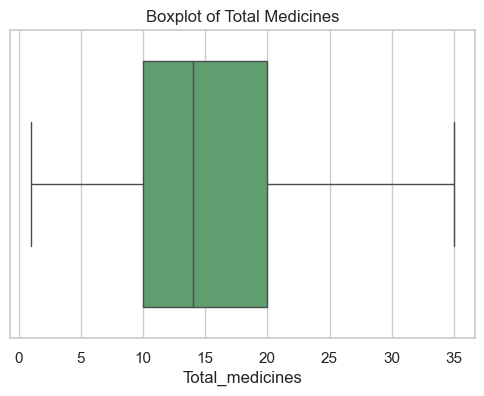

In [3]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Total_medicines'],color="g")
plt.title("Boxplot of Total Medicines")
plt.savefig("reports/figures/medicines_boxplot.png")
plt.show()

### for Categorical Columns:

#### Bar Plot – Readmission Distribution


#### Purpose:

##### Helps understand how serious readmission problem is.

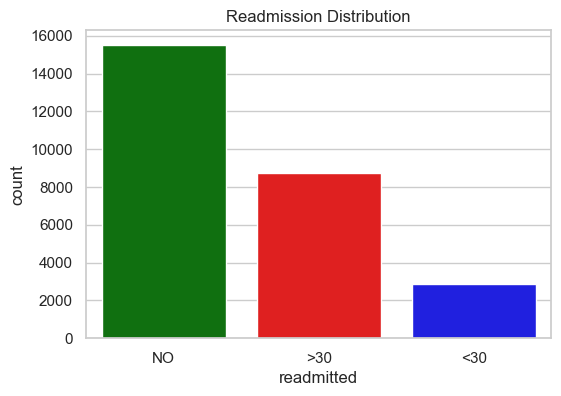

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', hue="readmitted",data=df ,palette=["green","red","blue"])
plt.title("Readmission Distribution")
plt.savefig("reports/figures/readmission_barplot.png")
plt.show()

## 2. Bivariate Analysis

#### Numeric vs Numeric:  scatter plot

##### Purpose:

##### Check relationship between hospital stay and treatment intensity.

The scatter plot shows no strong linear relationship between length of hospital stay and total number of medications. Patients with both short and long stays received varying numbers of medications.

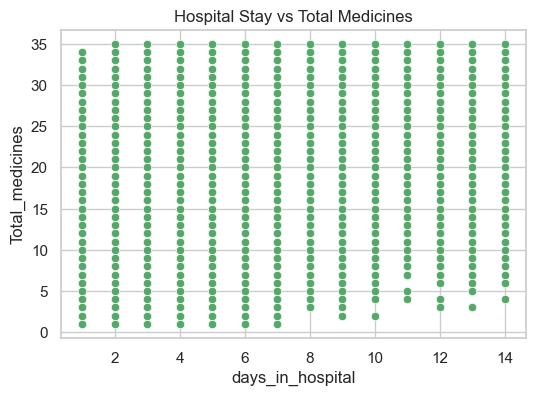

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='days_in_hospital', y='Total_medicines', data=df,color="g")
plt.title("Hospital Stay vs Total Medicines")
plt.savefig("reports/figures/stay_vs_medicine.png")
plt.show()

#### numeric vs Categorical:box plot

#### Purpose: 

##### Compare hospital stay length across readmission categories.supports decision-making about discharge planning.

The boxplot indicates that patients who were readmitted (<30 and >30 days) tend to have slightly longer hospital stays compared to patients who were not readmitted. This suggests that length of hospital stay may be associated with readmission risk.readmition medain stay:4 days, no readmition meadian stay: 3 days

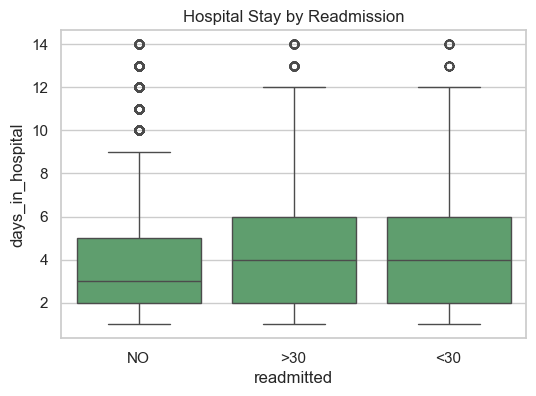

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x='readmitted', y='days_in_hospital', data=df,color="g")
plt.title("Hospital Stay by Readmission")
plt.savefig("reports/figures/stay_by_readmission.png")
plt.show()

#### Categorical vs Categorical:bar plot

##### purpose:

##### To examine whether hospital readmission patterns differ across medical specialties and identify departments with higher readmission burden.

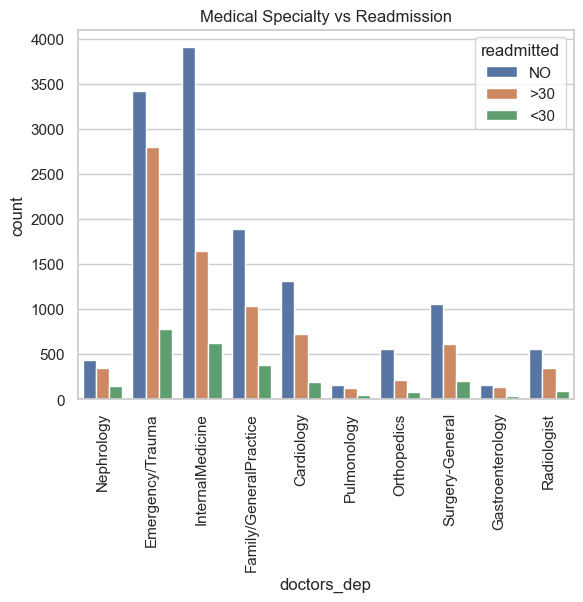

In [11]:
top_specialty = df['doctors_dep'].value_counts().head(10).index
df_top = df[df['doctors_dep'].isin(top_specialty)]

sns.countplot(x='doctors_dep', hue='readmitted', data=df_top)
plt.xticks(rotation=90)
plt.title("Medical Specialty vs Readmission")
plt.show()

### Categorical vs Target Analysis

#### purpose:

##### to examine whether insulin treatment is associated with hospital readmission risk.

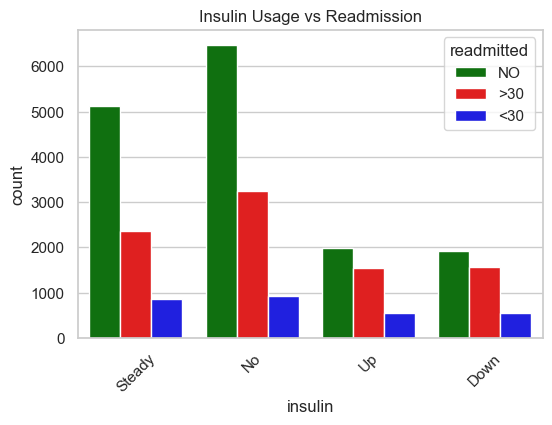

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='insulin', hue='readmitted', data=df,palette=["green","red","blue"])
plt.title("Insulin Usage vs Readmission")
plt.xticks(rotation=45)
plt.savefig("reports/figures/insulin_vs_readmission.png")
plt.show()

## 3 .Segment Analysis

#### purpose: 

##### check high-risk age groups.


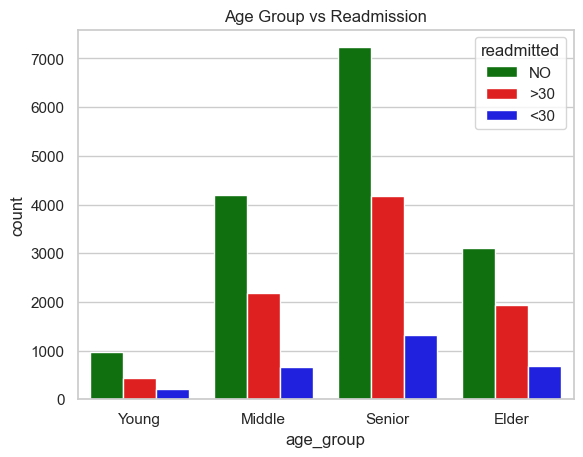

In [8]:
df['age_group'] = pd.cut(df['age'], bins=[0,40,60,80,100], 
                         labels=['Young','Middle','Senior','Elder'])
sns.countplot(x='age_group', hue='readmitted', data=df,palette=["green","red","blue"])
plt.title("Age Group vs Readmission")
plt.savefig("reports/figures/age_segment.png")
plt.show()

### Day 3 Progress

- Performed univariate analysis on numerical and categorical variables
- Conducted bivariate analysis (numeric-numeric, numeric-categorical)
- Completed segment analysis
- Exported figures to reports/figures/

In [9]:
df.to_csv("day3_output.csv", index=False)

## Data Analysis Insights & Actions


### Insight 1: Majority of Patients Stay 2–6 Days in Hospital


#### Evidence:

Histogram of days_in_hospital

Median ≈ 3 days

#### Interpretation:

Most patients have short hospital stays. Only a small portion stay longer than 7–10 days.

#### Action:

Standard discharge protocols may be sufficient for short-stay patients.

Extra monitoring should be considered for patients staying longer than 7 days.

### Insight 2: Readmitted Patients Tend to Stay Slightly Longer


#### Evidence:

Boxplot: days_in_hospital vs readmitted

Slightly higher median for <30 and >30 groups

#### Interpretation:

Patients who were readmitted tend to have longer hospital stays compared to those not readmitted.

#### Action:

Flag long-stay patients before discharge.

Provide early follow-up calls within 3–5 days.

Assign discharge coordinators for high-risk patients.

### Insight 3: No Strong Linear Relationship Between Stay Length and Medicines


#### Evidence:

Scatter plot: days_in_hospital vs Total_medicines

No clear upward pattern

#### Interpretation:

Longer hospital stay does not always mean more medications. Severity is influenced by multiple factors.

#### Action:

Do not rely only on hospital stay length to assess severity.

Combine multiple indicators (medications + diagnoses + visits).

 
### Insight 4: High Medication Count Indicates Potential Complexity


#### Evidence:

Boxplot of Total_medicines

Presence of higher medication outliers

#### Interpretation:

Some patients receive significantly higher numbers of medications, suggesting complex medical conditions.

#### Action:

Review medication-heavy patients before discharge.

Ensure medication reconciliation is properly completed.

Provide medication education and adherence guidance.

### Insight 5: Age-Based Segmentation Shows Higher Risk in Older Groups


#### Evidence:

Bar plot: age_group vs readmitted

#### Interpretation:

Older patients may show slightly higher readmission trends.

#### Action:

Develop elderly-specific discharge planning.

Arrange follow-up visits for patients above 65 years.


### Insight 6: Internal Medicine and Emergency Departments Show Higher Readmission Burden

#### Evidence:

Count plot: medical_specialty vs readmitted

#### Interpretation:

Internal Medicine handles a large number of chronic diabetic cases, which naturally increases the likelihood of readmission due to long-term disease instability.

Emergency/Trauma departments treat acute complications, which may lead to short-term (<30 days) readmissions if underlying conditions are not fully stabilized.

#### Action:

Implement specialty-specific discharge protocols, especially in Internal Medicine and Emergency departments.

Introduce early follow-up scheduling (within 3–7 days) for patients discharged from high-readmission specialties.

Develop department-level monitoring dashboards to track readmission patterns.



### Insight 7: Insulin Usage is Associated with Higher Readmission Risk

#### Evidence:

Count plot: insulin vs readmitted

#### Interpretation:

Patients who required insulin adjustment (Up or Down) or were maintained on insulin (Steady) tend to show higher readmission counts compared to patients not receiving insulin adjustments.

#### Action:

Implement enhanced discharge counseling for insulin-treated patients.

Schedule early follow-up appointments (within 7 days) for patients with insulin adjustments.

Provide structured glucose monitoring plans before discharge.

